<a href="https://colab.research.google.com/github/pawaramit1423/Image-Classifier/blob/master/Imgclassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AMIT ANIL PAWAR**

# **IMAGE CLASSIFIER PROJECT**


In [1]:
!pip install fastai --upgrade --quiet

     |████████████████████████████████| 194kB 7.1MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 


In [3]:
from fastai.vision.all import *

# **Collecting Data**

In [4]:
path = Path('data')
path.mkdir(exist_ok=True)

In [13]:
!wget -q https://github.com/pawaramit1423/Image_Scrapper/blob/master/ship.txt
!wget -q https://github.com/pawaramit1423/Image_Scrapper/blob/master/car.txt
!wget -q https://github.com/pawaramit1423/Image_Scrapper/blob/master/bike.txt

In [20]:
download_images('data/ship', Path('ship.txt'))
download_images('data/car', Path('car.txt'))
download_images('data/bike', Path('bike.txt'))

In [21]:
files = get_image_files(path)
len(files)

279

In [22]:
failed = verify_images(files)
failed

(#3) [Path('data/car/00000030.jpg'),Path('data/car/00000081.jpg'),Path('data/car/00000002.jpg')]

In [23]:
failed.map(Path.unlink) # delete corrupted files

(#3) [None,None,None]

In [24]:
files = get_image_files(path)
len(files)

276

# **DataLoaders**

In [26]:
vehicals = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # x,y
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=25),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [27]:
dls = vehicals.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


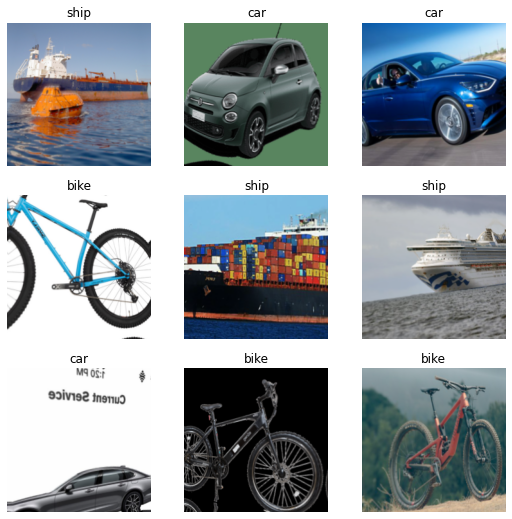

In [29]:
dls.train.show_batch(max_n=9, nrows=3)

# **Learner**

In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.169509,0.219554,0.090909,00:13


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.357399,0.049393,0.018182,00:13
1,0.201681,0.031132,0.018182,00:13
2,0.149084,0.033163,0.018182,00:13


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

In [32]:
learn.predict(files[101])

('bike', tensor(0), tensor([9.9936e-01, 6.3490e-04, 6.3615e-07]))

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


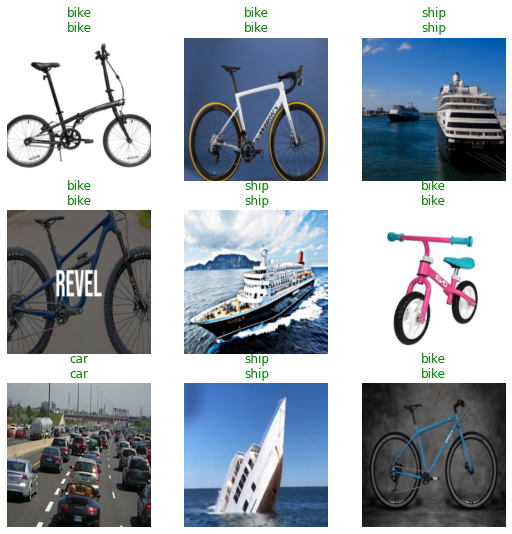

In [33]:
learn.show_results()

# **Inference**

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


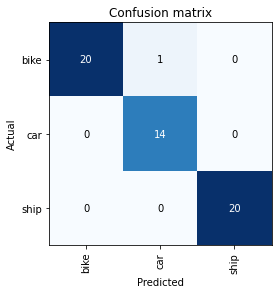

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

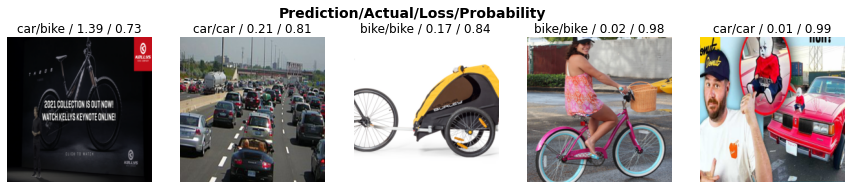

In [35]:
interp.plot_top_losses(5, nrows=1)

# **Deploying Model**

In [41]:
learn.export('export.pkl')


In [42]:
!pip install streamlit --quiet
!pip install colab-everything --quiet

In [43]:
!pip install colab_everything


In [45]:
from colab_everything import ColabStreamlit
ColabStreamlit('app.py')

KeyboardInterrupt: ignored